<a href="https://colab.research.google.com/github/RachanaFPatil/Deep-Learning-Reinforcement-Learning/blob/main/MLP_NAND_gate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# NAND Dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[1], [1], [1], [0]])

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    s = sigmoid(x)
    return s * (1 - s)

Single Layer Perceptron

In [2]:
np.random.seed(0)
W = np.random.randn(2, 1)
b = np.zeros((1,))
lr = 0.1
epochs = 10000

for i in range(epochs):
    z = X @ W + b
    y_hat = sigmoid(z)
    loss = np.mean((y_hat - y)**2)

    dz = 2 * (y_hat - y) * sigmoid_deriv(z)
    dW = X.T @ dz
    db = np.sum(dz)

    W -= lr * dW
    b -= lr * db

    if i % 2000 == 0:
        print(f"[Single Layer] Epoch {i}, Loss: {loss:.4f}")

def predict_single(X):
    return (sigmoid(X @ W + b) > 0.5).astype(int)

[Single Layer] Epoch 0, Loss: 0.3093
[Single Layer] Epoch 2000, Loss: 0.0077
[Single Layer] Epoch 4000, Loss: 0.0035
[Single Layer] Epoch 6000, Loss: 0.0022
[Single Layer] Epoch 8000, Loss: 0.0016


Multi Layer Perceptron

In [12]:
W1 = np.random.randn(2, 3)
b1 = np.zeros((1, 3))
W2 = np.random.randn(3, 1)
b2 = np.zeros((1,))

for i in range(epochs):
    z1 = X @ W1 + b1
    a1 = sigmoid(z1)
    z2 = a1 @ W2 + b2
    y_hat = sigmoid(z2)

    loss = np.mean((y - y_hat) ** 2)

    dz2 = 2 * (y_hat - y) * sigmoid_deriv(z2)
    dW2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0)

    dz1 = dz2 @ W2.T * sigmoid_deriv(z1)
    dW1 = X.T @ dz1
    db1 = np.sum(dz1, axis=0)

    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

    if i % 2000 == 0:
        print(f"[MLP] Epoch {i}, Loss: {loss:.4f}")

# For single-layer
def predict_single_xy(x1, x2):
    x = np.array([[x1, x2]])
    out = sigmoid(x @ W + b)
    return int(out > 0.5)

# For MLP
def predict_mlp_xy(x1, x2):
    x = np.array([[x1, x2]])
    a1 = sigmoid(x @ W1 + b1)
    out = sigmoid(a1 @ W2 + b2)
    return int(out > 0.5)

[MLP] Epoch 0, Loss: 0.1887
[MLP] Epoch 2000, Loss: 0.0032
[MLP] Epoch 4000, Loss: 0.0012
[MLP] Epoch 6000, Loss: 0.0007
[MLP] Epoch 8000, Loss: 0.0005


Predictions

In [5]:
print("\n Single-layer perceptron predictions:")
print(predict_single(X).ravel())

print("\n MLP predictions:")
print(predict_mlp(X).ravel())

print("\n Expected output: [1 1 1 0]")


 Single-layer perceptron predictions:
[1 1 1 0]

 MLP predictions:
[1 1 1 0]

 Expected output: [1 1 1 0]


Decision Boundary Visualization

<ipython-input-12-3f1ef23db24f>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(out > 0.5)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


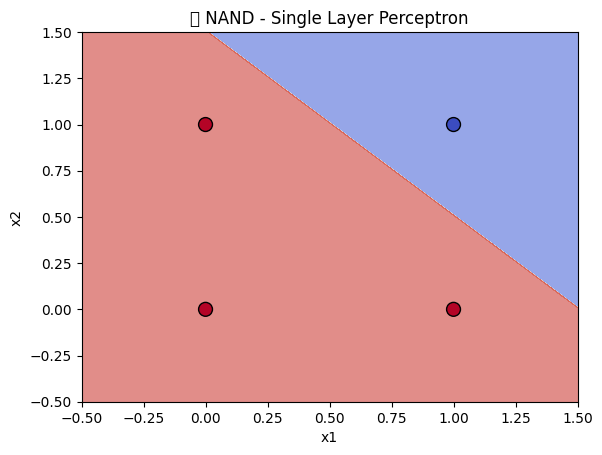

<ipython-input-12-3f1ef23db24f>:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(out > 0.5)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


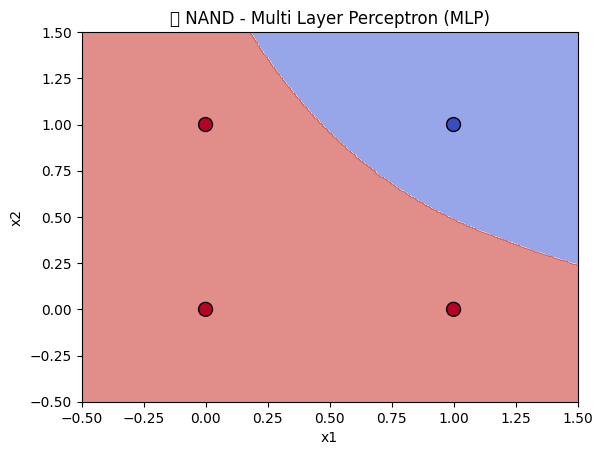

In [13]:
def plot_decision_boundary_custom(predict_fn, title):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    Z = np.array([predict_fn(x1, x2) for x1, x2 in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=plt.cm.coolwarm, edgecolors='k', s=100)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()
plot_decision_boundary_custom(predict_single_xy, " NAND - Single Layer Perceptron")
plot_decision_boundary_custom(predict_mlp_xy, " NAND - Multi Layer Perceptron (MLP)")

